In [1]:
#Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math
import warnings
warnings.simplefilter("ignore")

In [2]:
df_final=pd.read_csv(r"C:\Users\franc\Desktop\DATA\PROJET 6 Analysez les ventes d'une librairie avec R ou Python\df_final.csv")

In [3]:
display(df_final) #Affichage de notre dataframe nettoyé

,Unnamed: 0,id_prod,price,categ,client_id,sex,birth,age,date,session_id,date_mois,date_annee
0,0,0_1518,4.18,0,c_103,f,1986,36,2022-05-20,s_211425,2022-05,2022
1,1,1_251,15.99,1,c_8534,m,1988,34,2022-02-02,s_158752,2022-02,2022
2,2,0_1277,7.99,0,c_6714,f,1968,54,2022-06-18,s_225667,2022-06,2022
3,3,2_209,69.99,2,c_6941,m,2000,22,2021-06-24,s_52962,2021-06,2021
4,4,0_1509,4.99,0,c_4232,m,1980,42,2023-01-11,s_325227,2023-01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
657721,679327,0_1551,12.99,0,c_8489,f,1951,71,2022-01-15,s_150195,2022-01,2022
657722,679328,1_639,10.99,1,c_4370,f,1977,45,2022-03-19,s_181434,2022-03,2022
657723,679329,0_1425,12.99,0,c_304,f,1988,34,2022-12-20,s_314704,2022-12,2022
657724,679330,0_1994,4.98,0,c_2227,m,1986,36,2021-07-16,s_63204,2021-07,2021


# Calcul du CA

In [4]:
#CA total sans le mois d'octobre
ca_total= df_final['price'].sum()
print(f" Le CA total sans octobre est de {ca_total:.2f} €")


 Le CA total sans octobre est de 11535206.51 €


In [5]:
#Différence entre avec mois octobre et sans le mois d'octobre
ecart_ca= 11856079.72-ca_total
print(f"En enlevant le mois d'octobre, nous avons un écart de CA de {round(ecart_ca,2)} €")

En enlevant le mois d'octobre, nous avons un écart de CA de 320873.21 €


In [6]:
#Nombre de ventes totales
ventes=(df_final['session_id'].value_counts()).sum()
print(f"Il y a un total de {ventes} ventes")

Il y a un total de 657726 ventes


In [7]:
#Panier moyen
prix_panier_moyen = df_final.groupby(["session_id"])["price"].sum().mean()

print(f"Le panier moyen est de {round(prix_panier_moyen,2)}€")

Le panier moyen est de 34.87€


## Calcul de la moyenne mobile 

La moyenne mobile permet de lisser une série de valeurs exprimées en fonction du temps

pandas.DataFrame.rolling(n).mean()

On doit déterminer la taille de la fenêtre (rolling) ici on prend 7 jours et 30 jours

In [8]:
#Evolution du CA dans le temps 
schema_evolution_ca=df_final.groupby(['date'])['price'].sum().reset_index()
schema_evolution_ca.head()


,date,price
0,2021-03-01,16575.858188
1,2021-03-02,15497.088188
2,2021-03-03,15198.690000
3,2021-03-04,15196.070000
4,2021-03-05,17471.370000


In [9]:
# Calcul de la moyenne mobile 7 jours et 30 jours
schema_evolution_ca[ 'moy_mobile7' ] = schema_evolution_ca.price.rolling(7).mean()

schema_evolution_ca[ 'moy_mobile30' ] = schema_evolution_ca.price.rolling(30).mean()
  
# Affichage 
print(schema_evolution_ca.head(35))

          date         price   moy_mobile7  moy_mobile30
0   2021-03-01  16575.858188           NaN           NaN
1   2021-03-02  15497.088188           NaN           NaN
2   2021-03-03  15198.690000           NaN           NaN
3   2021-03-04  15196.070000           NaN           NaN
4   2021-03-05  17471.370000           NaN           NaN
5   2021-03-06  15785.280000           NaN           NaN
6   2021-03-07  14770.838188  15785.027795           NaN
7   2021-03-08  15679.530000  15656.980911           NaN
8   2021-03-09  15710.510000  15687.469741           NaN
9   2021-03-10  15496.870000  15730.066884           NaN
10  2021-03-11  14801.140000  15673.648313           NaN
11  2021-03-12  14448.580000  15241.821170           NaN
12  2021-03-13  14324.840000  15033.186884           NaN
13  2021-03-14  15231.770000  15099.034286           NaN
14  2021-03-15  16141.660000  15165.052857           NaN
15  2021-03-16  15971.740000  15202.371429           NaN
16  2021-03-17  16025.470000  1

<AxesSubplot:xlabel='date', ylabel='price'>

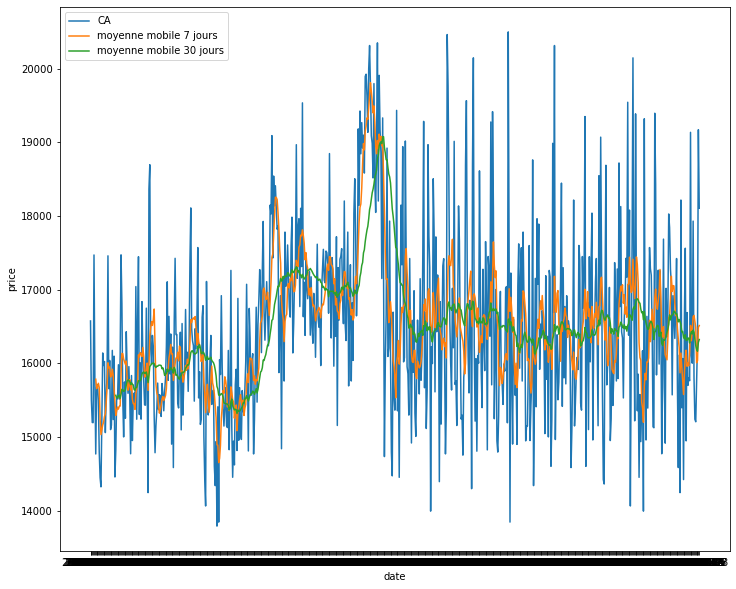

In [10]:
#Représention graphique de la moyenne mobile 7 et 30 jours
plt.figure( figsize = ( 12, 10))

sns.lineplot( x = 'date',
             y = 'price',
             data = schema_evolution_ca,
             label = 'CA')

sns.lineplot( x = 'date',
             y = 'moy_mobile7',
             data = schema_evolution_ca,
             label = 'moyenne mobile 7 jours')

sns.lineplot( x = 'date',
             y = 'moy_mobile30',
             data = schema_evolution_ca,
             label = 'moyenne mobile 30 jours')

# CA par catégorie

In [11]:
#Visualisation du CA par catégorie
ca_total_categ = df_final.groupby(['date_annee','categ'])['price'].sum().reset_index()
ca_total_categ.head(9)

display(ca_total_categ.apply(lambda s: s.apply('{0:.0f}'.format)))


,date_annee,categ,price
0,2021,0,1684621
1,2021,1,1744234
2,2021,2,1022025
3,2022,0,2194247
4,2022,1,2485275
5,2022,2,1430436
6,2023,0,343889
7,2023,1,390452
8,2023,2,240029


Text(0.5, 1.0, 'CA par catégorie et par an')

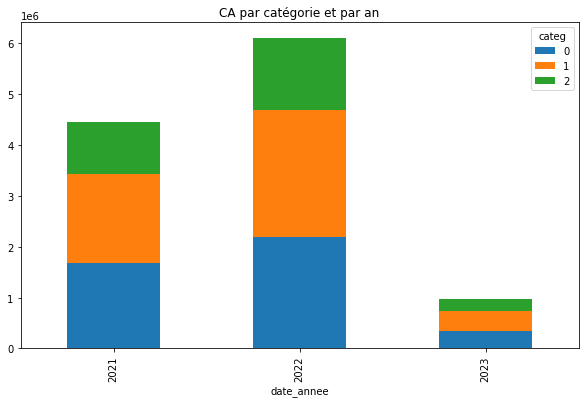

In [12]:
#CA par catégorie et par an
ca_total_categ.groupby(['date_annee','categ']).sum().unstack().plot(kind='bar', y = 'price', stacked=True, figsize = (10,6))

plt.title("CA par catégorie et par an")

,categ,price
0,0,4222757
1,1,4619960
2,2,2692489


Text(0.5, 1.0, 'CA par catégorie')

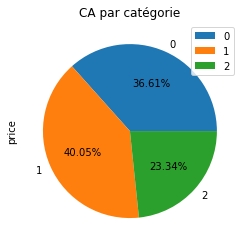

In [13]:
#Ca pour chaque catégorie
ca_categ = df_final.groupby(['categ'])['price'].sum().reset_index()
display(ca_categ.apply(lambda s: s.apply('{0:.0f}'.format)).head())
ca_categ.plot(kind='pie', y = 'price', autopct='%1.2f%%')
plt.title("CA par catégorie")

##  Nombre de ventes par catégories 

In [14]:
#Nombre de ventes par catégories 
vente_categ= df_final.groupby(['categ'])[['price']].count().reset_index()
vente_categ= vente_categ.rename(columns={'price':'vente'})

display(vente_categ)

print("Nous avons : \n 396 911 ventes pour la categorie 0 \n 225 503 ventes pour la catégorie 1 \n 35 312 ventes pour la catégorie 2")

,categ,vente
0,0,396911
1,1,225503
2,2,35312


Nous avons : 
 396 911 ventes pour la categorie 0 
 225 503 ventes pour la catégorie 1 
 35 312 ventes pour la catégorie 2


Text(0.5, 1.0, 'Ventes par catégorie')

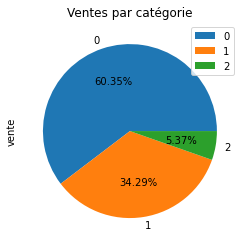

In [15]:
#Representation graphique vente par categorie 

vente_categ.plot(kind='pie', y = 'vente', autopct='%1.2f%%')
plt.title("Ventes par catégorie")

Catégorie 0 : nous avons 396 911 ventes soit 60.35% des ventes 

Catégorie 1 : nous avons 225 503 ventes soit 34.29% des ventes

Catégorie 2 : nous avons 35 312 ventes soit 5.37% des ventes

In [16]:
# Prix moyen par catégorie
moy_categ = df_final.groupby('categ')[['price']].mean().reset_index()
display(round(moy_categ,2))

,categ,price
0,0,10.64
1,1,20.49
2,2,76.25


# Tops & Flops

In [17]:
#Les livres les plus rentables:
df_livres= df_final.groupby (['id_prod'])['price'].sum().reset_index()
df_bestseller= df_livres.sort_values(['price'], ascending = False)
print("Les produits les plus rentables")
display(df_bestseller.head(10))

print("Les bestsellers sont majoritairement dans la catégorie 2")

#les moins rentables:
df_flop= df_livres.sort_values(['price'], ascending = True)

print("Les produits les moins rentables")
display(df_flop.head(10))

print("Les produits les moins rentables sont majoritairement dans la catégorie 0")


Les produits les plus rentables


,id_prod,price
3095,2_159,92265.68
3069,2_135,67403.23
3044,2_112,62840.10
3033,2_102,58962.58
3151,2_209,55362.09
2618,1_395,53950.39
2590,1_369,53665.63
3042,2_110,51916.50
2640,1_414,51615.78
3200,2_39,51147.18


Les bestsellers sont majoritairement dans la catégorie 2
Les produits les moins rentables


,id_prod,price
594,0_1539,0.99
2178,0_898,1.27
313,0_1284,1.38
1896,0_643,1.98
718,0_1653,1.98
2078,0_807,1.99
1783,0_541,1.99
664,0_1601,1.99
801,0_1728,2.27
1543,0_324,2.36


Les produits les moins rentables sont majoritairement dans la catégorie 0


In [18]:
# Top & Flop par categorie
top_flop= pd.pivot_table(df_final, index = ['categ', 'id_prod'], values = 'price',aggfunc=["count", "sum"]).reset_index()
display(top_flop)

,categ,id_prod,count,sum
,,,price,price
0,0,0_0,1194,4477.50
1,0,0_1,469,5154.31
2,0,0_10,18,323.10
3,0,0_100,3,61.80
4,0,0_1000,408,2790.72
...,...,...,...,...
3259,2,2_95,4,395.96
3260,2,2_96,581,27835.71
3261,2,2_97,13,2092.87


## Top & Flop catégorie 0 

In [19]:
#Top & Flop nombre de ventes catégorie 0 
top_flop_0 = top_flop.loc[top_flop['categ'] == 0, :]
top_0= top_flop_0.set_index('id_prod').sort_values(('count', 'price'), ascending=False)
print("Les meilleurs ventes de la catégorie 0")

display(top_flop_0.head())


print("Les flops en nombre de ventes de la catégorie 0 ")

top_flop_0= top_flop_0.set_index('id_prod').sort_values(('count', 'price'), ascending=True)
display(top_flop_0.head())

Les meilleurs ventes de la catégorie 0


,categ,id_prod,count,sum
,,,price,price
0,0,0_0,1194,4477.50
1,0,0_1,469,5154.31
2,0,0_10,18,323.10
3,0,0_100,3,61.80
4,0,0_1000,408,2790.72


Les flops en nombre de ventes de la catégorie 0 


,categ,count,sum
,,price,price
id_prod,,,
0_898,0,1,1.27
0_1151,0,1,2.99
0_1284,0,1,1.38
0_549,0,1,2.99
0_1601,0,1,1.99


## Top & Flop catégorie 1 


In [20]:
#Top & Flop nombre de ventes catégorie 1
top_flop_1 = top_flop.loc[top_flop['categ'] == 1, :]
top_flop_1= top_flop_1.set_index('id_prod').sort_values(('count', 'price'), ascending=False)
print("Les tops ventes de la catégorie 1")
display(top_flop_1.head())

print("Les flops de ventes de la catégorie 1")

display(top_flop_1.tail())

Les tops ventes de la catégorie 1


,categ,count,sum
,,price,price
id_prod,,,
1_369,1,2237,53665.63
1_417,1,2173,45611.27
1_414,1,2166,51615.78
1_498,1,2117,49474.29
1_425,1,2084,35407.16


Les flops de ventes de la catégorie 1


,categ,count,sum
,,price,price
id_prod,,,
1_146,1,3,95.94
1_409,1,3,167.97
1_402,1,2,69.04
1_420,1,2,14.24
1_514,1,2,135.32


In [21]:
#Top & Flop du CA catégorie 1 par référence 
top_flop_ca_ref_1 = top_flop.loc[top_flop['categ'] == 1, :]
top_flop_ca_ref_1= top_flop_ca_ref_1.set_index('id_prod').sort_values(('sum','price'), ascending=False)

print("Les produits les plus rentables de la catégorie 1")
display(top_flop_ca_ref_1.head())


print("Les produits les moins rentables de la catégorie 1")
display(top_flop_ca_ref_1.tail())

Les produits les plus rentables de la catégorie 1


,categ,count,sum
,,price,price
id_prod,,,
1_395,1,1861,53950.39
1_369,1,2237,53665.63
1_414,1,2166,51615.78
1_383,1,1762,51080.38
1_498,1,2117,49474.29


Les produits les moins rentables de la catégorie 1


,categ,count,sum
,,price,price
id_prod,,,
1_404,1,3,29.55
1_473,1,9,26.91
1_470,1,4,21.64
1_224,1,4,19.80
1_420,1,2,14.24


# Top & Flop catégorie 2 

In [22]:
#Top & Flop nombre de ventes catégorie 2
top_flop_2 = top_flop.loc[top_flop['categ'] == 2, :]
top_flop_2= top_flop_2.set_index('id_prod').sort_values(('count', 'price'), ascending=False)
print("Les tops ventes de la catégorie 2")

display(top_flop_2.head())

print("Les flops de ventes de la catégorie 2")

display(top_flop_2.tail())

Les tops ventes de la catégorie 2


,categ,count,sum
,,price,price
id_prod,,,
2_102,2,997,58962.58
2_135,2,977,67403.23
2_112,2,930,62840.10
2_39,2,882,51147.18
2_37,2,867,42474.33


Les flops de ventes de la catégorie 2


,categ,count,sum
,,price,price
id_prod,,,
2_77,2,2,291.98
2_78,2,2,334.98
2_23,2,1,115.99
2_98,2,1,149.74
2_81,2,1,86.99


In [23]:
#Top & Flop du CA catégorie 2 par référence 
top_flop_ca_ref_2 = top_flop.loc[top_flop['categ'] == 2, :]
top_flop_ca_ref_2= top_flop_ca_ref_2.set_index('id_prod').sort_values(('sum','price'), ascending=False)
print("Les produits les plus rentables de la catégorie 2")

display(top_flop_ca_ref_2.head())

print("Les produits les moins rentables de la catégorie 2")

display(top_flop_ca_ref_2.tail())

Les produits les plus rentables de la catégorie 2


,categ,count,sum
,,price,price
id_prod,,,
2_159,2,632,92265.68
2_135,2,977,67403.23
2_112,2,930,62840.10
2_102,2,997,58962.58
2_209,2,791,55362.09


Les produits les moins rentables de la catégorie 2


,categ,count,sum
,,price,price
id_prod,,,
2_107,2,6,203.94
2_93,2,2,157.98
2_98,2,1,149.74
2_23,2,1,115.99
2_81,2,1,86.99


# Répartition de CA entre les clients

In [24]:
#Clients les plus dépensiers
df_bestcust= df_final.groupby (['client_id'])['price'].sum().reset_index()
df_bestcustomer= df_bestcust.sort_values(['price'], ascending = False)
df_bestcustomer= df_bestcustomer.set_index('client_id')
print('les clients les plus dépensiers')
display(df_bestcustomer.head(10))
print('On remarque que les 4 plus gros clients se partagent une part très conséquente des ventes comparé aux autres clients')

les clients les plus dépensiers


,price
client_id,
c_1609,312755.080000
c_4958,282654.610000
c_6714,149847.579128
c_3454,111798.624564
c_2899,5214.050000
c_1570,5136.140000
c_3263,5129.890000
c_7319,5120.550000
c_8026,4980.048188


On remarque que les 4 plus gros clients se partagent une part très conséquente des ventes comparé aux autres clients


<Figure size 936x1440 with 0 Axes>

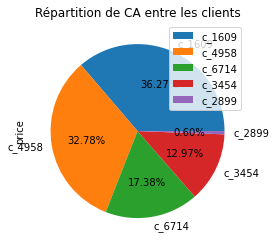

In [25]:
# Représentation graphique des 5 plus gros clients
plt.figure(figsize=(13, 20)) 
df_bestcustomer10= df_bestcustomer.head(5).plot(kind='pie', y = 'price', autopct='%1.2f%%')
plt.title("Répartition de CA entre les clients")
plt.show()


Dans le top 5 des clients, Les 4 plus gros clients ont généré la grande majorité du CA soit 99.40% du CA

In [26]:
#Analyse des clients ayant ouvert le plus de sessions shopping
df_bestquanticlient = df_final.groupby(['client_id'])[['session_id']].count().sort_values('session_id', ascending=False)
display(df_bestquanticlient.head(10))
print("Ces mêmes clients ont également ouvert un nombre considérable de sessions par rapport aux autres clients")


,session_id
client_id,
c_1609,24472
c_6714,8903
c_3454,6635
c_4958,5090
c_3263,392
c_2595,384
c_2140,381
c_2077,370
c_7421,368


Ces mêmes clients ont également ouvert un nombre considérable de sessions par rapport aux autres clients


In [27]:
#Représentation de la part des 4 plus gros clients dans le CA total
ca_top4clients = df_bestcustomer.head(4).price.sum() / df_final.price.sum()*100

print ("Les 4 plus gros clients apportent à eux seuls près de", round(ca_top4clients,2), "% du CA total. Nous pouvons supposer qu'il s'agit de professionnels et les retirer de notre analyse")
print ("Nous décidons de les mettre à part pour de futures analyses.")

Les 4 plus gros clients apportent à eux seuls près de 7.43 % du CA total. Nous pouvons supposer qu'il s'agit de professionnels et les retirer de notre analyse
Nous décidons de les mettre à part pour de futures analyses.


In [28]:
#Création d'un df avec les supposés 4 clients B2B 
client_pro = df_final[(df_final.client_id== 'c_1609')|(df_final.client_id=='c_6714')|(df_final.client_id=='c_3454')|(df_final.client_id=='c_4958')]
client_pro.head()

,Unnamed: 0,id_prod,price,categ,client_id,sex,birth,age,date,session_id,date_mois,date_annee
2,2,0_1277,7.99,0,c_6714,f,1968,54,2022-06-18,s_225667,2022-06,2022
17,17,1_661,22.99,1,c_6714,f,1968,54,2022-09-13,s_267366,2022-09,2022
32,32,1_426,19.44,1,c_4958,m,1999,23,2021-06-21,s_51846,2021-06,2021
63,63,1_506,13.65,1,c_4958,m,1999,23,2021-09-29,s_97203,2021-09,2021
67,67,0_1446,8.09,0,c_1609,m,1980,42,2022-10-05,s_278030,2022-10,2022


In [29]:
#Création d'un df sans les clients professionnels
df_final_sans_pro = df_final.drop(client_pro.index).reset_index(drop=True)
df_final_sans_pro.head()

,Unnamed: 0,id_prod,price,categ,client_id,sex,birth,age,date,session_id,date_mois,date_annee
0,0,0_1518,4.18,0,c_103,f,1986,36,2022-05-20,s_211425,2022-05,2022
1,1,1_251,15.99,1,c_8534,m,1988,34,2022-02-02,s_158752,2022-02,2022
2,3,2_209,69.99,2,c_6941,m,2000,22,2021-06-24,s_52962,2021-06,2021
3,4,0_1509,4.99,0,c_4232,m,1980,42,2023-01-11,s_325227,2023-01,2023
4,5,0_1418,8.57,0,c_1478,f,1972,50,2022-10-20,s_285425,2022-10,2022


# Courbe de Lorenz

La courbe de Lorenz permet d'avoir une représentation graphique de la distribution des revenus au sein d’une population donnée, ici les clients.

In [30]:
#Mettre les valeurs par ordre croissant 
df_cust1= df_final_sans_pro.groupby (['client_id'])['price'].sum().reset_index()
df_sort_cust= df_cust1.set_index('client_id').sort_values(['price'], ascending = True)
df_sort_cust

,price
client_id,
c_8140,8.300000
c_8114,9.980000
c_240,11.060000
c_4648,11.200000
c_2793,12.990000
...,...
c_8026,4980.048188
c_7319,5120.550000
c_3263,5129.890000


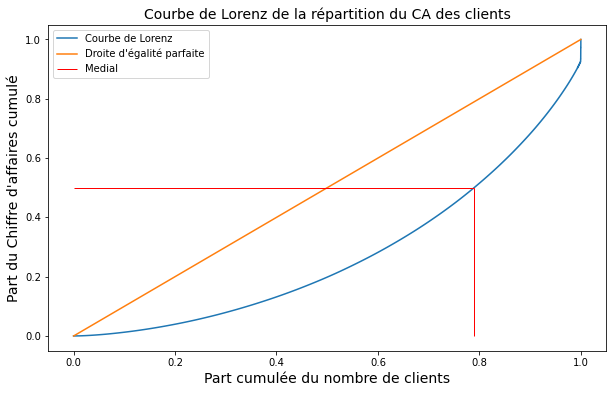

In [31]:
# Courbe de Lorenz

cum = df_bestcust.cumsum() # CA cumulé par ordre croissant
n_client = len(cum)

ca_cum = df_bestcust.price.values
lorenz = np.cumsum(np.sort(ca_cum)) / ca_cum.sum()

# La courbe de Lorenz commence à 0
lorenz = np.append([0],lorenz) 

# Calcul de l'intersection
medial = lorenz[(lorenz < 0.5)].size / lorenz.size 

xaxis = np.linspace(0-1/n_client,1+1/n_client,len(lorenz)) 

plt.figure(figsize =(10,6))
plt.plot(xaxis,lorenz,drawstyle='steps-post',label = 'Courbe de Lorenz')
plt.plot([0,1], [0,1], label = "Droite d'égalité parfaite") #Traçage de la droite d'égalité parfaite

plt.vlines(medial, ymin=0, ymax=.5, color='red', linewidth=1,label='Medial')
plt.hlines(xmin=medial, xmax=0, y=.5, color='red', linewidth=1)
plt.title('Courbe de Lorenz de la répartition du CA des clients',fontsize = 14, color = 'black')
plt.xlabel('Part cumulée du nombre de clients', fontsize=14)
plt.ylabel("Part du Chiffre d'affaires cumulé", fontsize=14) 
plt.legend(loc='upper left', fontsize=10)



La courbe de Lorenz montre que 77% des clients représentent 50% du CA si nous ne tenons pas compte des clients professionnels. La courbe est en ligne droite de 0.9 à 1 car cela représente les 4 plus gros clients

Calcul de l'index de Gini: Le coefficient de Gini est obtenu en doublant l'aire entre la «ligne d'égalité parfaite» et la courbe de Lorenz Le coefficient de Gini est une valeur de 0 à 1, et plus il est proche de 1, plus l'inégalité est grande, et plus il est proche de 0, moins le biais est important.

In [32]:
#Calcul de l'index de Gini
arr = df_sort_cust.price.values


def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

print("l'indice de Gini est", gini(arr),"L'indice de Gini de 0.4037 nous indique qu'il y a une légère inégalité entre la répartition des clients et du CA ")

l'indice de Gini est 0.4037361851534822 L'indice de Gini de 0.4037 nous indique qu'il y a une légère inégalité entre la répartition des clients et du CA 


In [33]:
#Nombre de ventes par rapport au genre du client
vente_sex=df_final_sans_pro.groupby(['sex'])['price'].count().reset_index()
vente_sex=vente_sex.rename(columns={'price':'ventes'})
vente_sex

,sex,ventes
0,f,319004
1,m,293622


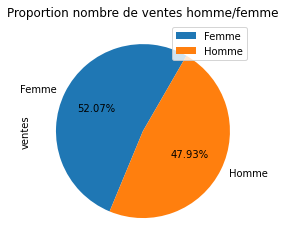

In [34]:
vente_sex.plot(kind='pie', y = 'ventes',labels=['Femme','Homme'], autopct='%1.2f%%',startangle=60)
plt.title("Proportion nombre de ventes homme/femme")
plt.show()

In [35]:
#CA en fonction du sexe du client
ca_sex=df_final_sans_pro.groupby(['sex'])['price'].sum().reset_index()
display(ca_sex)

,sex,price
0,f,5.555739e+06
1,m,5.122412e+06


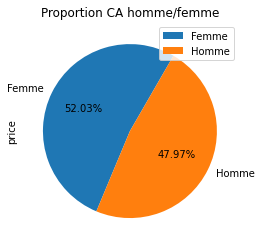

In [36]:
#Proportion du CA entre homme/femme
ca_sex.plot(kind='pie', y = 'price',labels=['Femme','Homme'], autopct='%1.2f%%',startangle=60)
plt.title("Proportion CA homme/femme")
plt.show()

In [37]:
categ_0= df_final_sans_pro.loc[df_final_sans_pro['categ']==0,:]
traitement_categ_0 = categ_0.groupby('date_mois')['price'].sum().reset_index()

categ_1= df_final_sans_pro.loc[df_final_sans_pro['categ']==1,:]
traitement_categ_1 = categ_1.groupby('date_mois')['price'].sum().reset_index()

categ_2= df_final_sans_pro.loc[df_final_sans_pro['categ']==2,:]
traitement_categ_2 = categ_2.groupby('date_mois')['price'].sum().reset_index()


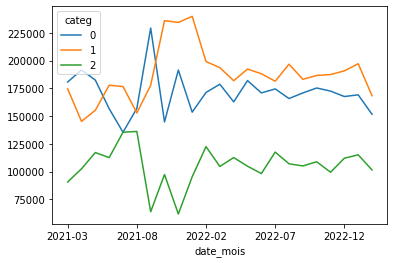

In [38]:
#Calcul du CA par mois et par catégorie
df_categ = pd.pivot_table(df_final_sans_pro, index = ['date_mois'], columns = 'categ', values = 'price',aggfunc=np.sum).plot()


Text(0, 0.5, 'price')

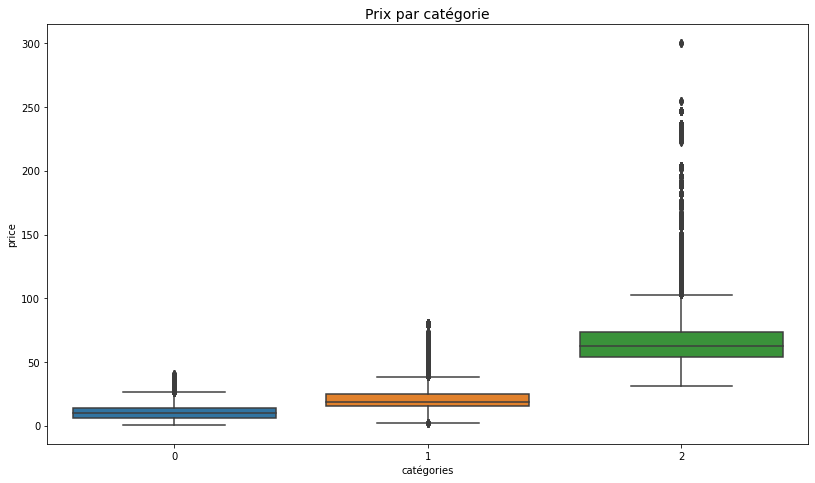

In [39]:
plt.figure(figsize=(30,17))
ax1 = plt.subplot(2,2,4)
sns.boxplot(data=df_final_sans_pro, x="categ", y="price")
plt.title('Prix par catégorie',fontsize = 14)
plt.xlabel('catégories')
plt.ylabel('price')

# Julie: Tests statistiques de corrélation


# 1: Lien entre le genre du client et la catégorie de livres achetés

Nous avons deux variables qualitatives (genre, catégorie) que nous analyserons avec le test du CHI-2
car nous avons 2 variables qualitatives et au moins 2 groupes dans chaque variables

- Assumption : Création d'un tableau de contingence 
- Hypothèse
*Hypothèse H0 : Les variables ne sont pas corrélées
*Hypothèse H1 : Les variables sont corrélées
-Calcul du CHI2 et de P-value

In [40]:
#Tableau de contingence : données observées
X = "categ"
Y = "sex"

cont = df_final_sans_pro[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
print(cont)
print('Il y aurait plus de femmes qui achètent des livres')

sex         f       m   Total
categ                        
0      192025  178044  370069
1      110550  100227  210777
2       16429   15351   31780
Total  319004  293622  612626
Il y aurait plus de femmes qui achètent des livres


In [41]:
#Test du Chi-2

chi2, pvalue, dof, exp = st.chi2_contingency(cont)
print("La statistique de Pearson du test khi-deux est :", chi2)
print("La p-value qui est l'unique valeur nécessaire pour prendre notre décision",pvalue)
print("le degré de liberté est", dof) #Les degrés de liberté sont les mesures du nombre de valeurs dans la statistique qui peuvent varier librement sans influencer le résultat de la statistique.
print("la p-value est de 0.00459<0.05 (qui correspond à notre niveau de confiance alpha 5%) , l'hypothèse H0 est rejetée, les deux variables sont corrélées avec un degré de liberté de 6")

La statistique de Pearson du test khi-deux est : 18.75788251563821
La p-value qui est l'unique valeur nécessaire pour prendre notre décision 0.004592685293327868
le degré de liberté est 6
la p-value est de 0.00459<0.05 (qui correspond à notre niveau de confiance alpha 5%) , l'hypothèse H0 est rejetée, les deux variables sont corrélées avec un degré de liberté de 6


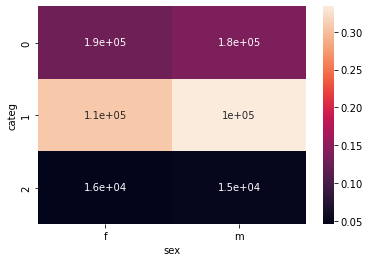

None

Les variables 'genre' du client et la 'catégorie' de livres achetés sont très peu corrélées pour la catégorie 1


In [42]:
#Visualisation de la caorrelation avec le heatmap
import seaborn as sns
import scipy.stats as st

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_final_sans_pro)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
display(plt.show())
print("Les variables 'genre' du client et la 'catégorie' de livres achetés sont très peu corrélées pour la catégorie 1")

# Test de Pearson : Test de corrélation entre deux variables quantitatives

# Le montant des achats et l'âge des clients

- 1: Test de normalité graphique pour savoir si les variables sont gaussiennes ou non

In [43]:
df_final_sans_pro

,Unnamed: 0,id_prod,price,categ,client_id,sex,birth,age,date,session_id,date_mois,date_annee
0,0,0_1518,4.18,0,c_103,f,1986,36,2022-05-20,s_211425,2022-05,2022
1,1,1_251,15.99,1,c_8534,m,1988,34,2022-02-02,s_158752,2022-02,2022
2,3,2_209,69.99,2,c_6941,m,2000,22,2021-06-24,s_52962,2021-06,2021
3,4,0_1509,4.99,0,c_4232,m,1980,42,2023-01-11,s_325227,2023-01,2023
4,5,0_1418,8.57,0,c_1478,f,1972,50,2022-10-20,s_285425,2022-10,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
612621,679327,0_1551,12.99,0,c_8489,f,1951,71,2022-01-15,s_150195,2022-01,2022
612622,679328,1_639,10.99,1,c_4370,f,1977,45,2022-03-19,s_181434,2022-03,2022
612623,679329,0_1425,12.99,0,c_304,f,1988,34,2022-12-20,s_314704,2022-12,2022
612624,679330,0_1994,4.98,0,c_2227,m,1986,36,2021-07-16,s_63204,2021-07,2021


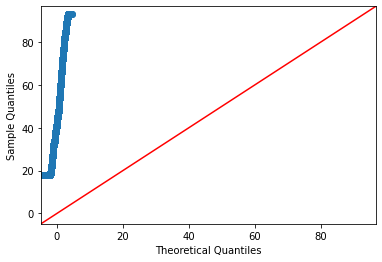

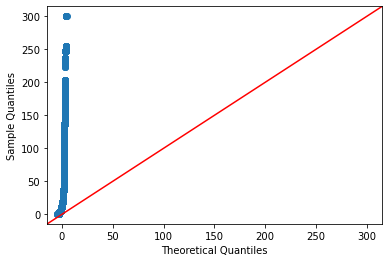

In [44]:
#Méthode graphique: QQ-Plot pour savoir si les vairable suivent une distribution normale
    
import statsmodels.api as sm
import pylab as py
  
sm.qqplot(df_final_sans_pro['age'], line ='45')
py.show()  

sm.qqplot(df_final_sans_pro['price'], line ='45')
py.show()  

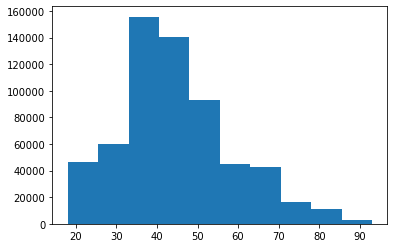

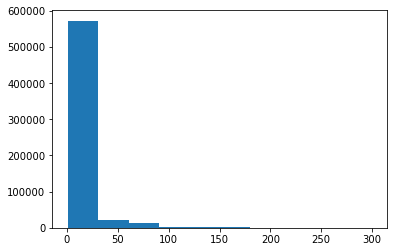

Les variables age et price ne suivent pas une loi normale


In [45]:
#Visualisation graphique en histogramme
plt.hist(df_final_sans_pro['age'])
plt.show()

plt.hist(df_final_sans_pro['price'])
plt.show()

print('Les variables age et price ne suivent pas une loi normale')

### Test de Shapiro pour vérifier la normalité

Ho(Accepted): La distribution suit la loi normale.(Po>0.05)

Ha(Rejected): La distribution ne suit pas la loi normale

In [83]:
from scipy.stats import shapiro
print(shapiro(df_final_sans_pro['age']))
print("La variable age a un P-value de 0.0 <0.05 et donc ce n'est pas une distribution normale ")


print(shapiro(df_final_sans_pro['price']))
print("La variable montant_achat a un P-value de 0.0 <0.05 et donc ce n'est pas une distribution normale ")


ShapiroResult(statistic=0.9709652662277222, pvalue=0.0)
La variable age a un P-value de 0.0 <0.05 et donc ce n'est pas une distribution normale 
ShapiroResult(statistic=0.5485800504684448, pvalue=0.0)
La variable montant_achat a un P-value de 0.0 <0.05 et donc ce n'est pas une distribution normale 


# Test de Spearman, test de corrélation de deux variables quantitatives : l'âge des clients, le montant total et la fréquence des achats

Pour faire le test de Pearson, nous devons nous assurer des conditions suivantes:
- Déterminer si deux variables continues sont indépendantes : le test de corrélation de Spearman. 
L’H0 à tester est : l'âge et le montant des achats sont indépendants

- Visualisation avec nuage de points avec droite de régression linéaire 
- Les variables sont non paramétriques d'après test de Shapiro
-Pearson est plus appropriée pour les mesures prises à partir d'une échelle d'intervalle

In [47]:
#Age, Nombre d'achats, montant total achat
age_ca = df_final_sans_pro.groupby('age')['price'].agg(['count', 'sum']).sort_values('sum').reset_index()
age_ca.head()

,age,count,sum
0,91,164,2691.19
1,93,199,3197.08
2,92,222,3959.24
3,87,260,4654.29
4,90,293,4803.64


In [77]:
#Fréquence d'achat
tab= pd.crosstab(index=df_final_sans_pro['age'], columns='count')
tab/tab.sum()

col_0,count
age,
18,0.024108
19,0.006918
20,0.007293
21,0.006792
22,0.007017
...,...
89,0.000514
90,0.000478
91,0.000268


(15.0, 95.0)

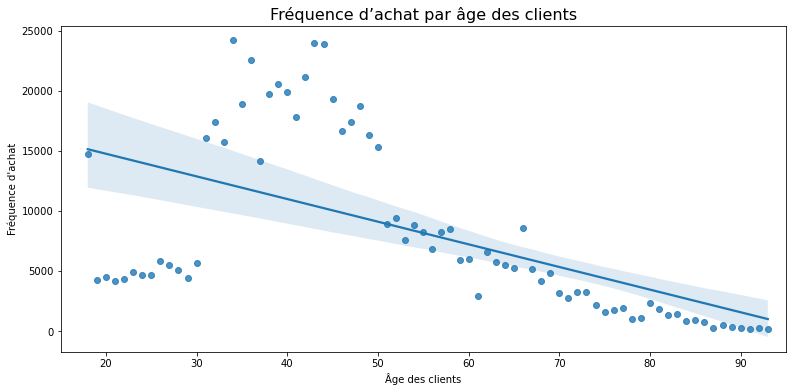

In [79]:
# Regression linéaire de la fréquence des achats et l'âge des clients
plt.figure(figsize=(13, 6))
sns.regplot(x='age', y='count', data = age_ca)
plt.ylabel( "Fréquence d'achat")
plt.xlabel('Âge des clients')
plt.title("Fréquence d’achat par âge des clients",fontsize= 16)
plt.xlim(15,95)

In [75]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(age_ca["age"],age_ca["count"])

#print Spearman rank correlation and p-value
print("Avec un rho de ",rho,"on a une forte relation négative entre les deux variables")

print("La P-value", p, "<0.05. On peut rejeter l'hypothèse nulle ")
print("Plus le client est âgé, moins il va dépenser")

Avec un rho de  -0.6737935748462065 on a une forte relation négative entre les deux variables
La P-value 2.5520940213877932e-11 <0.05. On peut rejeter l'hypothèse nulle 
Plus le client est âgé, moins il va dépenser


(15.0, 95.0)

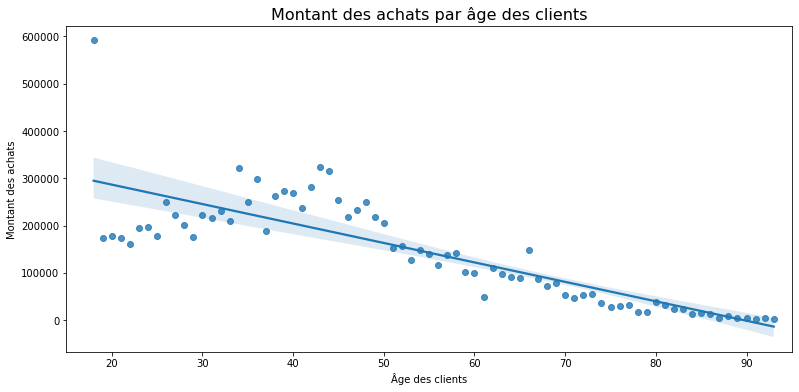

In [51]:
#frequence d'achat et l'âge des clients
plt.figure(figsize=(13, 6))
sns.regplot(x='age', y='sum', data = age_ca)
plt.ylabel( "Montant des achats")
plt.xlabel('Âge des clients')
plt.title("Montant des achats par âge des clients",fontsize= 16)
plt.xlim(15,95)

In [88]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(age_ca["age"],age_ca["sum"])

#print Spearman rank correlation and p-value
print("Avec un rho de ",rho,"on a une très forte relation négative entre les deux variables")

print("La P-value", p, "<0.05. On peut rejeter l'hypothèse nulle ")


Avec un rho de  -0.8740396445659603 on a une très forte relation négative entre les deux variables
La P-value 6.668764227215193e-25 <0.05. On peut rejeter l'hypothèse nulle 


- Nous avons une forte corrélation négative. Par conséquent, plus le client est âgé et moins il va dépenser et avec une fréquence plus faible

# Taille du panier moyen 

In [53]:
df_final_sans_pro

,Unnamed: 0,id_prod,price,categ,client_id,sex,birth,age,date,session_id,date_mois,date_annee
0,0,0_1518,4.18,0,c_103,f,1986,36,2022-05-20,s_211425,2022-05,2022
1,1,1_251,15.99,1,c_8534,m,1988,34,2022-02-02,s_158752,2022-02,2022
2,3,2_209,69.99,2,c_6941,m,2000,22,2021-06-24,s_52962,2021-06,2021
3,4,0_1509,4.99,0,c_4232,m,1980,42,2023-01-11,s_325227,2023-01,2023
4,5,0_1418,8.57,0,c_1478,f,1972,50,2022-10-20,s_285425,2022-10,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
612621,679327,0_1551,12.99,0,c_8489,f,1951,71,2022-01-15,s_150195,2022-01,2022
612622,679328,1_639,10.99,1,c_4370,f,1977,45,2022-03-19,s_181434,2022-03,2022
612623,679329,0_1425,12.99,0,c_304,f,1988,34,2022-12-20,s_314704,2022-12,2022
612624,679330,0_1994,4.98,0,c_2227,m,1986,36,2021-07-16,s_63204,2021-07,2021


In [54]:
#Panier moyen B2C : CA/nombre de commandes
panier_moyen= df_final_sans_pro.groupby(["session_id"])["price"].sum().mean()


print(f"Le panier moyen est de {round(prix_panier_moyen,2)}€")

Le panier moyen est de 34.87€


# Taille du panier moyen par catégorie

In [55]:
# panier moyen pour la catégorie 0
prix_panier_moyen_categ_0 = df_final_sans_pro.loc[df_final_sans_pro["categ"] == 0, :]
prix_panier_moyen_categ_0 = prix_panier_moyen_categ_0.groupby(["session_id"])["price"].sum().mean()

print(f"Le panier moyen de la catégorie 0 est de {round(prix_panier_moyen_categ_0,2)}€")

Le panier moyen de la catégorie 0 est de 19.54€


In [56]:
# panier moyen pour la catégorie 1
prix_panier_moyen_categ_1 = df_final_sans_pro.loc[df_final_sans_pro["categ"] == 1, :]
prix_panier_moyen_categ_1 = prix_panier_moyen_categ_1.groupby(["session_id"])["price"].sum().mean()

print("Le panier moyen de la catégorie 1 est de {:,.2f} €.".format(prix_panier_moyen_categ_1))

Le panier moyen de la catégorie 1 est de 25.96 €.


In [57]:
# panier moyen pour la catégorie 2
prix_panier_moyen_categ_2 = df_final_sans_pro.loc[df_final_sans_pro["categ"] == 2, :]
prix_panier_moyen_categ_2 = prix_panier_moyen_categ_2.groupby(["session_id"])["price"].sum().mean()

print(f"Le panier moyen de la catégorie 2 est de {round(prix_panier_moyen_categ_2,2)}€")

Le panier moyen de la catégorie 2 est de 90.98€


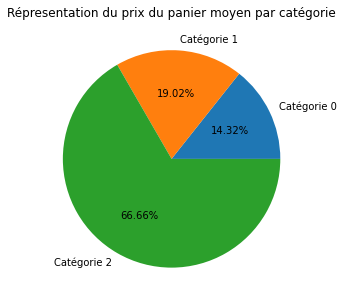

In [58]:
#Répresentation graphique du prix du panier moyen par catégorie
categ = [prix_panier_moyen_categ_0, prix_panier_moyen_categ_1, prix_panier_moyen_categ_2]
labels = ["Catégorie 0", "Catégorie 1", "Catégorie 2"]

plt.figure(figsize=(10, 5)) 
plt.pie(categ, labels=labels, autopct='%.2f%%')
plt.title("Répresentation du prix du panier moyen par catégorie")
plt.show()

## Discrétisation de l'âge en tranche d'âge

Création de classe age en utilisant la formule de Formule de Scott : 
k = (xmax – xmin) ⁄ (3,5 × σ × N(-1 ⁄ 3))

σ = écart-type
N= population


In [59]:
#Taille de la population
taille_pop=df_final_sans_pro['client_id'].unique().shape[0]
taille_pop

8594

In [60]:
#Statistiques de age
df_final_sans_pro[['age']].describe()

,age
count,612626.000000
mean,44.251449
std,13.886603
min,18.000000
25%,35.000000
50%,43.000000
75%,51.000000
max,93.000000


In [61]:
#Calcul des classes age
xmin= 18
xmax= 93
intervalle_interquartile= 51-35 # 16
N = taille_pop

#Formule de Scott : k = (xmax – xmin) ⁄ (3.5 × standard dev × N ^(-1 ⁄ 3))
k = (xmax-xmin)/(3.5*13.88 * N **(-1 / 3))
print(k)
print("La discrétisation via la formule de Scott ne nous convient pas, donc nous décidons d'utiliser la discrétisation customisée ")

31.62293699016332
La discrétisation via la formule de Scott ne nous convient pas, donc nous décidons d'utiliser la discrétisation customisée 


In [62]:
# Discrétisation customisée de la tranche d'âge
labels_age = ['18-30','30-40','50-60', '60-70','70-80','80-93']

df_final_sans_pro['tranche_age'] = pd.cut(df_final_sans_pro['age'], 6, labels=labels_age)
df_final_sans_pro

,Unnamed: 0,id_prod,price,categ,client_id,sex,birth,age,date,session_id,date_mois,date_annee,tranche_age
0,0,0_1518,4.18,0,c_103,f,1986,36,2022-05-20,s_211425,2022-05,2022,30-40
1,1,1_251,15.99,1,c_8534,m,1988,34,2022-02-02,s_158752,2022-02,2022,30-40
2,3,2_209,69.99,2,c_6941,m,2000,22,2021-06-24,s_52962,2021-06,2021,18-30
3,4,0_1509,4.99,0,c_4232,m,1980,42,2023-01-11,s_325227,2023-01,2023,30-40
4,5,0_1418,8.57,0,c_1478,f,1972,50,2022-10-20,s_285425,2022-10,2022,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
612621,679327,0_1551,12.99,0,c_8489,f,1951,71,2022-01-15,s_150195,2022-01,2022,70-80
612622,679328,1_639,10.99,1,c_4370,f,1977,45,2022-03-19,s_181434,2022-03,2022,50-60
612623,679329,0_1425,12.99,0,c_304,f,1988,34,2022-12-20,s_314704,2022-12,2022,30-40
612624,679330,0_1994,4.98,0,c_2227,m,1986,36,2021-07-16,s_63204,2021-07,2021,30-40


In [63]:
#Tableau croisé dynamique sur le nombre de ventes en fonction de la classe d'âge et du genre du client
pivot = pd.pivot_table(data=df_final_sans_pro,index='tranche_age',columns='sex',values='price',aggfunc={'price' : 'count'})
pivot

sex,f,m
tranche_age,,
18-30,37830,34881
30-40,127734,124257
50-60,92055,78348
60-70,39653,39648
70-80,16253,12885
80-93,5479,3603


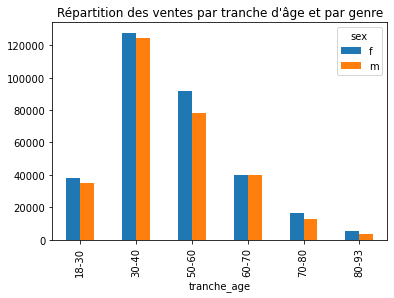

In [64]:
# Répartition des ventes par tranche d'âge et par genre
pivot.groupby('tranche_age').sum().plot(kind='bar')
plt.title("Répartition des ventes par tranche d'âge et par genre")
plt.show()

Les tranches d'âge qui sont les plus gros consommateurs sont : Les 30-40 ans, suivis par les 50-60 ans et les 60-70 ans.

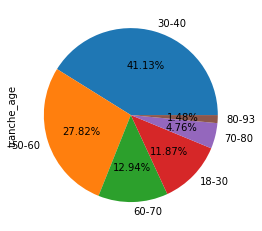

In [65]:
# Diagramme en secteur
df_final_sans_pro["tranche_age"].value_counts(normalize=True).plot(kind='pie', autopct='%1.2f%%')
plt.show() # Affiche le graphique

# Analyse du test de la variance ANOVA, corrélation entre une variable qualitative et quantitative : tranche d'âge et fréquence d'achat

## Calcul de la fréquence d'achat

In [66]:
#Calcul de la fréquence d'achat
def frequence(x):
    freq = {}
    freq["frequence"] = (x['session_id'].count() / x['client_id'].value_counts().count()) #Calcul de la fréquence d'achat
    return pd.Series(freq, index=['frequence'])

df_frequence_achat = df_final_sans_pro.groupby(['date_mois', 'tranche_age']).apply(frequence)

display(df_frequence_achat)

frequence
date_mois tranche_age           
2021-03   18-30         2.632393
          30-40         6.724749
          50-60         5.238467
          60-70         3.482161
          70-80         3.196286
...                          ...
2023-02   30-40         5.821320
          50-60         4.871757
          60-70         3.204684
          70-80         2.989247
          80-93         3.041667

[138 rows x 1 columns]

In [67]:
df_frequence_achat = df_frequence_achat.reset_index()#On reset l'index pour pouvoir faire un boxplot

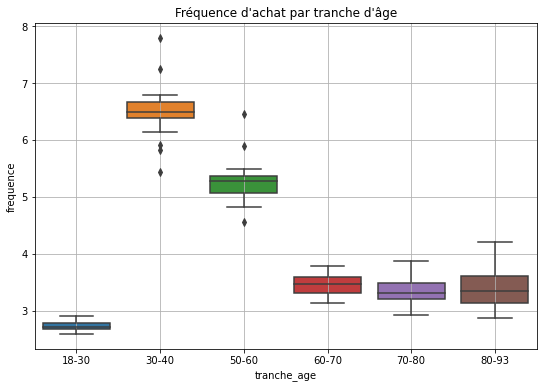

In [68]:
#Représentation graphique de la fréquence d'achat par rapport à la tranche d'âge
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='tranche_age',y='frequence',data=df_frequence_achat, showfliers=True)
plt.title("Fréquence d'achat par tranche d'âge")
plt.grid()
plt.show()

Les tranches d'âge qui sont achètent le plus souvent sont : Les 30-40 ans, suivis par les 50-60 ans et les 60-70 ans.


# # Analyse du test de la variance ANOVA


In [69]:
#Importation des librairies
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [70]:

lm = ols('frequence ~ tranche_age', data = df_frequence_achat).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
tranche_age,5.0,240.758485,48.151697,508.419181,2.236767e-84
Residual,132.0,12.501543,0.094709,NaN,NaN


In [71]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              frequence   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     508.4
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           2.24e-84
Time:                        10:25:11   Log-Likelihood:                -30.117
No. Observations:                 138   AIC:                             72.23
Df Residuals:                     132   BIC:                             89.80
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.7308      0.064     42.555      0.000       2.604       2.858
tranche_age[T.30-40]     3.7723      0.091     41.568      0.000       3.593       3.952
tranche_age[T.50-60]     2.5284      0.091     27.861      0.000       2.349       2.708
tranche_age[T.60-70]     0.7372      0.091      8.124      0.000       0.558       0.917
tranche_age[T.70-80]     0.6031      0.091      6.646      0.000       0.424       0.783
tranche_age[T.80-93]     0.6695      0.091      7.378      0.000       0.490       0.849
==============================================================================
Omnibus:                       31.124   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.381
Skew:                           0.702   Prob(JB):                     4.39e-27
Kurtosis:                       7.375   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R_squared de 0.95, il existerait une relation entre l'âge et la fréquence d'achats.

P-value = 0.025 est inférieure à 0.05%, on peut rejeter l'hypothèse H0.

95% de la variation de la fréquence d'achat peut être expliqué par la tranche d'âge.